[[0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.28 0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]

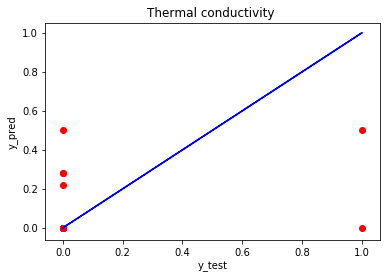

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 26 19:51:01 2020

@author: venka
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# # Importing the OLD dataset
# dataset = pd.read_csv('CopperDatasetV2.csv')
# X = dataset.iloc[:, 0:118].values
# y = dataset.iloc[:, 119:120].values


#UPDATED data with 200 data points.
dataset = pd.read_csv('../../Copper Dataset (version 2.0).csv')
X = dataset.iloc[:, 1:28].values
y = dataset.iloc[:, 0:1].values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:28])
X[:, 1:28] = imputer.transform(X[:, 1:28])

#trainingand testsplit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 428, min_samples_split = 2, min_samples_leaf = 1, max_features = "sqrt", max_depth= None, bootstrap = False, random_state = 0)
regressor.fit(X_train, np.ravel(y_train))
y_pred = regressor.predict(X_test)

#For TS
#n_estimators': 733, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True

#for T.C
#n_estimators': 944, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': False

#For new data T.C
#'n_estimators': 311, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False




np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

plt.scatter(y_test, y_pred, color='red')
plt.plot(y_test,y_test, color='blue')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Thermal conductivity ')


#Applying k-fold cross-validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= regressor, X= X_train, y = y_train, cv= 10, n_jobs = -1 )
A= accuracies.mean()
B= accuracies.std()
#Applying grid search to find best model and parameters
print('Random forests,thermalconductivity')
print('K-fold validation score for 10 folds')
print(accuracies)
print('mean')
print(A)
print('std')
print(B)



##Hyper parametertuning from datascience website
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                 'max_features': max_features,
#                 'max_depth': max_depth,
#                 'min_samples_split': min_samples_split,
#                 'min_samples_leaf': min_samples_leaf,
#                 'bootstrap': bootstrap}


# regressor = RandomForestRegressor()
# regressor_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# regressor_random.fit(X_train, y_train)
# L=regressor_random.best_params_
# print(L)